<a href="https://colab.research.google.com/github/gimenopea/CSCI6907/blob/main/NN_Multi_Layered_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- 
### Assignment #1 - Multi Layered Perceptron
pgimeno@gwu.edu

Fall 2022

---


**Task:**
- For this assignment you will be manually calculating the forward and backward propagation for the provided network.
- Your submission must include your work and the prediction and error for the network with the updated weights.



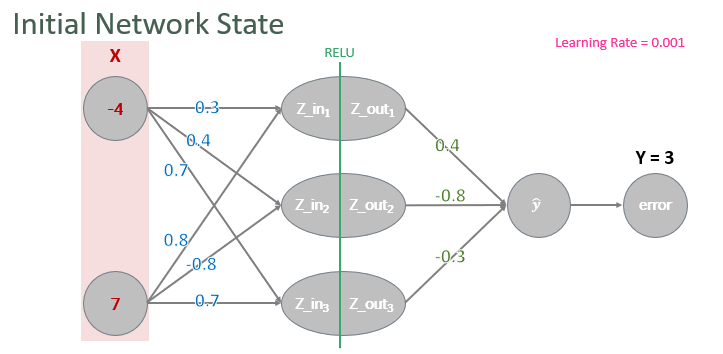

### 1. Network setup

---


In [2]:
import numpy as np
import matplotlib.pyplot as plt

#create layer class
class Layer:
    def __init__(self):
        self.bias = 0 #assuming all zero bias for all inbound nodes for now      


    def feed_forward(self, input, weights):
        return np.dot(input, weights)

    def relu(self, input):
        return np.maximum(0, input)

    def update_weights(self, weights, learning_rate, gradient):
        return weights - learning_rate * gradient

#initialize sample data

#input data
x = np.array([5,11])
y = 16
w1 = np.array([[.3,.8],[.4,-.8],[.7,.7]])
w2 = np.array([.4,-.8,-.3])
learning_rate = .001

### 2. Forward Propagation

---

In [5]:
hidden_layer = Layer()

#z_in before the activation function
z_in = hidden_layer.feed_forward(x, w1.T)
print(f'z_in: {z_in}')

#out after the relu activation 
z_out = hidden_layer.relu(z_in)
print(f'z_out: {z_out}')

#estimated y_hat
y_hat = hidden_layer.feed_forward(z_out, w2)
print(f'y_hat: {y_hat}')

#calculate loss
loss = (y_hat - y)**2
print(f'loss: {loss}')

#calculate gradient of loss with respect to y_hat
dloss_dy_hat = 2*(y_hat - y)
print(f'dloss_dy_hat: {dloss_dy_hat}')

z_in: [10.3 -6.8 11.2]
z_out: [10.3  0.  11.2]
y_hat: 0.7600000000000002
loss: 232.2576
dloss_dy_hat: -30.48


### 3. Back Propagation

By taking partial derivatives and through the chain rule, w2 can be updated by:

\begin{align}
        \frac{\partial error}{w_2} = \frac{\partial error}{\partial \hat{y}} * \frac{\partial\hat{y}}{\partial w_2}
\end{align}

---

\begin{align}
        \frac{\partial error}{\partial \hat{y}} = 2 (\hat{y} - y)
\end{align}

\begin{align}
        \frac{\partial zin}{\partial zout} = \left\{
        \begin{array}{cl}
        0 & x \le 0 \\
        1 & x > 0.
        \end{array}
        \right.
\end{align}

\begin{align}
        \frac{\partial\hat{y}}{\partial w_2} = Zout
\end{align}




In [8]:
#calculate gradient of y_hat with respect to w2
dy_hat_dw2 = z_out
print(f'dy_hat_dw2: {dy_hat_dw2}')

#calculate gradient of loss with respect to w2
dloss_dw2 = dloss_dy_hat * dy_hat_dw2
print(f'dloss_dw2: {dloss_dw2}')

#update w2 weights
w2_new = hidden_layer.update_weights(w2, learning_rate, dloss_dw2)
print(f'w2_new: {w2_new}')

dy_hat_dw2: [10.3  0.  11.2]
dloss_dw2: [-313.944   -0.    -341.376]
w2_new: [ 0.713944 -0.8       0.041376]


By taking partial derivatives and through the chain rule, w1 can be updated by:

\begin{align}
        \frac{\partial error}{w_1} = \frac{\partial error}{\partial zout}*\frac{\partial zout}{\partial zin} * \frac{\partial zin}{\partial w_1}
\end{align}

---

\begin{align}
        \frac{\partial error}{\partial zout} = 2 (\hat{y} - y)*w_2
\end{align}

\begin{align}
        \frac{\partial zout}{\partial zin} = \left\{
        \begin{array}{cl}
        0 & zout \le 0 \\
        1 & zout > 0.
        \end{array}
        \right.
\end{align}

\begin{align}
        \frac{\partial zin}{\partial w_1} = X
\end{align}


In [17]:

#update w1 weights 
#calculate gradient of loss with respect to z_out
dloss_dz_out = dloss_dy_hat * w2    
print(f'dloss_dz_out: {dloss_dz_out}')

#calculate gradient of z_out with respect to z_in
dz_out_dz_in = np.where(z_in > 0, 1, 0)
print(f'\ndz_out_dz_in: {dz_out_dz_in}')


#calculate gradient of z_in with respect to w1
dz_in_dw1 = x
print(f'\ndz_in_dw1: {dz_in_dw1}')

#for the two inputs
gradient_input1 =  x[0]*dloss_dz_out*dz_out_dz_in
gradient_input2 =  x[1]*dloss_dz_out*dz_out_dz_in

w1_new = hidden_layer.update_weights(w1[:,0], learning_rate, gradient_input1)
#append new columns to w1_new
w1_new2 = hidden_layer.update_weights(w1[:,1], learning_rate, gradient_input2)
w1_new = np.column_stack((w1_new, w1_new2))

print(f'\nw1_new: {w1_new}')

dloss_dz_out: [-12.192  24.384   9.144]

dz_out_dz_in: [1 0 1]

dz_in_dw1: [ 5 11]

w1_new: [[ 0.36096   0.934112]
 [ 0.4      -0.8     ]
 [ 0.65428   0.599416]]


### 4. Forward Propagation with updated weights

--- 

updated z_in: [10.3 -6.8 11.2]
updated z_out: [12.080032  0.        9.864976]
updated y_hat: 9.032639613184001
updated loss: 48.544110759772785


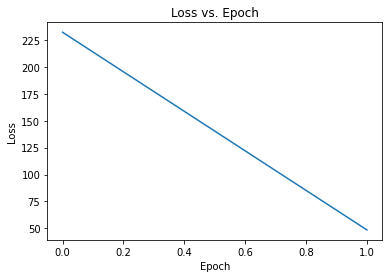

loss change: -0.7909902162091884


In [18]:
#forward propagate with new weights
z_in_updated = hidden_layer.feed_forward(x, w1_new.T)
print(f'updated z_in: {z_in}')

#forward propagate with relu activation
z_out_updated = hidden_layer.relu(z_in_updated)
print(f'updated z_out: {z_out_updated}')

#update y_hat
y_hat_updated = hidden_layer.feed_forward(z_out_updated, w2_new)
print(f'updated y_hat: {y_hat_updated}')

#calculate loss
loss_updated = (y_hat_updated - y)**2
print(f'updated loss: {loss_updated}')

#plot loss
losses = [loss, loss_updated]
plt.plot(losses)
#add title and axis labels
plt.title('Loss vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

#show percentage change in loss
loss_change = (loss_updated - loss)/loss
print(f'loss change: {loss_change}')